In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Connect to Database and Process the data

In [3]:
#Connecting Database instance 
conn = sqlite3.connect('Database/delhi.sqlite')

In [4]:
#Creating the cursor
c = conn.cursor()

In [5]:
#Creating the DataFrame
query = conn.execute("SELECT * From delhi_table")
cols = [column[0] for column in query.description]
df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
data = df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  80657 non-null  object 
 1   conds         80657 non-null  object 
 2   dewptm        80657 non-null  float64
 3   fog           80657 non-null  int64  
 4   hail          80657 non-null  int64  
 5   hum           80657 non-null  float64
 6   pressurem     80657 non-null  float64
 7   rain          80657 non-null  int64  
 8   snow          80657 non-null  int64  
 9   tempm         80657 non-null  float64
 10  thunder       80657 non-null  int64  
 11  tornado       80657 non-null  int64  
 12  vism          80657 non-null  float64
 13  wdird         80657 non-null  float64
 14  wdire         80657 non-null  object 
 15  wspdm         80657 non-null  float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ MB


In [7]:
data.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3


<AxesSubplot:>

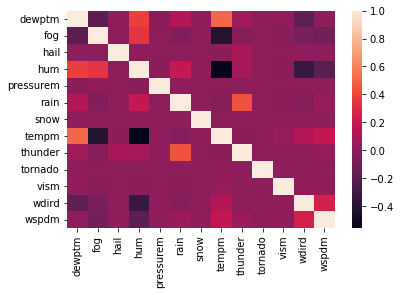

In [8]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False)

In [9]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data.set_index('datetime_utc', inplace= True)
data_df =data.resample('D').mean()

In [10]:
data_df.head()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
datetime_utc,,,,,,,,,,,,,
1996-11-01,11.000000,0.0,0.0,44.666667,1010.333333,0.0,0.0,24.666667,0.0,0.0,2.333333,93.333333,2.466667
1996-11-02,10.333333,0.0,0.0,47.190476,1009.809524,0.0,0.0,23.380952,0.0,0.0,3.476190,121.904762,8.028571
1996-11-03,12.136364,0.0,0.0,54.681818,1010.500000,0.0,0.0,22.272727,0.0,0.0,2.286364,116.363636,4.804545
1996-11-04,10.133333,0.0,0.0,46.600000,1011.333333,0.0,0.0,23.133333,0.0,0.0,2.326667,66.666667,2.226667
1996-11-05,8.200000,0.0,0.0,29.400000,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,10.020000


In [11]:
data_df = data_df[['tempm']]

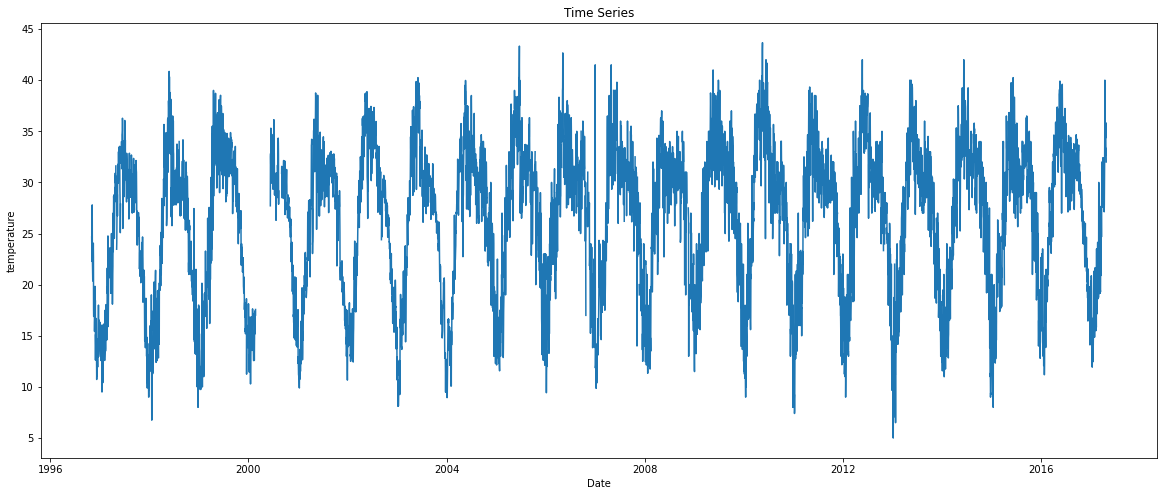

In [12]:
plt.figure(figsize=(20,8))
plt.plot(data_df)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

In [13]:
temp_annual = data['tempm'].resample("AS").agg(['mean', 'min', 'max'])

In [14]:
temp_annual.head()

,mean,min,max
datetime_utc,,,
1996-01-01,16.723062,4.0,34.0
1997-01-01,24.702072,5.0,43.0
1998-01-01,25.321593,5.0,72.0
1999-01-01,27.793387,6.0,63.0
2000-01-01,24.168488,5.0,41.0


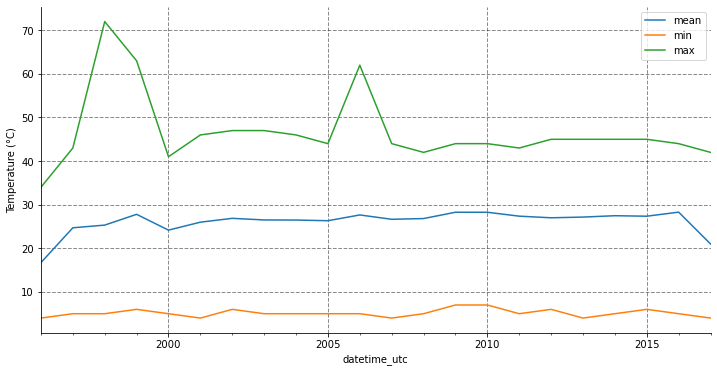

In [15]:
temp_annual.plot(figsize=(12, 6))
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()

This line graph visualises outliers in the dataset and it also shows that the outliers dont deeply affect the mean of the dataset. Due to the outliers hardly affecting the mean, we will leave them in the dataset.

In [16]:
data.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,80657.000000,80657.000000,80657.000000,80657.000000,8.065700e+04,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000
mean,15.676445,0.050907,0.000136,55.171926,2.199730e+03,0.027102,0.000012,26.340045,0.010216,0.000025,2.563318,169.093891,8.976131
std,7.150146,0.219809,0.011677,23.447379,3.558458e+05,0.162383,0.003521,8.242780,0.100558,0.004980,22.690289,118.166457,12.084670
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,36.000000,1.001000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,60.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,170.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


In [17]:
# Extracting the year 
def extract_year(value):
    return (value[0:4])
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))

In [18]:
# Extracting month
def extract_month(value):
    return (value[4:6])
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [19]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,year,month
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0,1996,11
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3,1996,11
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3,1996,11


In [20]:
df.dtypes

datetime_utc     object
conds            object
dewptm          float64
fog               int64
hail              int64
hum             float64
pressurem       float64
rain              int64
snow              int64
tempm           float64
thunder           int64
tornado           int64
vism            float64
wdird           float64
wdire            object
wspdm           float64
year             object
month            object
dtype: object

In [21]:
# Dropping three columns 'datetime_utc', 'wdire', 'Unnamed: 0'
df = df.drop(['datetime_utc', 'wdire'], axis =1)
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,year,month
0,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,1996,11
1,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,1996,11
2,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,1996,11
3,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,1996,11
4,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,1996,11


In [22]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'year',
       'month'],
      dtype='object')

In [23]:
ordered_columns = ['year','month', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds']
df = df[ordered_columns]

In [24]:
df.head()

,year,month,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,conds
0,1996,11,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,Haze
1,1996,11,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,Haze
2,1996,11,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,Haze
3,1996,11,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,Haze
4,1996,11,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,Haze


In [25]:
df.conds.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

# Split the Data into Training and Testing

In [26]:
# Create our features
X = df.drop("conds", axis=1)

# Create our target
y = df["conds"]


This pie chart shows an imbalanced dataset with about 82% of the data belonging to one particular class.

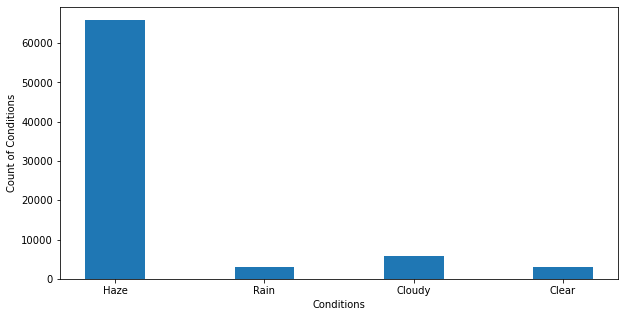

In [50]:
data = {'Haze':65925, 'Rain':3022, 'Cloudy':5832,
        'Clear':2878}
conditions = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(conditions, values,
        width = 0.4)
 
plt.xlabel("Conditions")
plt.ylabel("Count of Conditions")
plt.show()

In [29]:
X.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,80657.000000,80657.000000,80657.000000,80657.000000,8.065700e+04,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000
mean,15.676445,0.050907,0.000136,55.171926,2.199730e+03,0.027102,0.000012,26.340045,0.010216,0.000025,2.563318,169.093891,8.976131
std,7.150146,0.219809,0.011677,23.447379,3.558458e+05,0.162383,0.003521,8.242780,0.100558,0.004980,22.690289,118.166457,12.084670
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,36.000000,1.001000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,60.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,170.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


In [30]:
y.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Logistic Regression

In [32]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='newton-cg', random_state=1)
lr_model.fit(X_train, y_train)
print(f'Training Score: {lr_model.score(X_train, y_train)}')
print(f'Testing Score: {lr_model.score(X_test, y_test)}')

lr_train_score = lr_model.score(X_train, y_train)
lr_test_score = lr_model.score(X_test, y_test)

Training Score: 0.8565430139522582
Testing Score: 0.8520208281676172


In [33]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

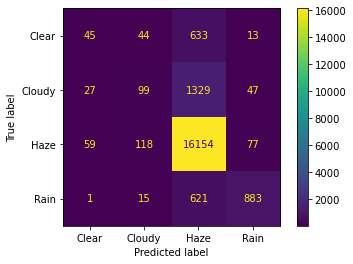

In [34]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()

In [35]:
# Calulating metrics
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score
lr_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')

In [36]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_lr))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.34      0.06      0.10       735
      Cloudy       0.36      0.07      0.11      1502
        Haze       0.86      0.98      0.92     16408
        Rain       0.87      0.58      0.70      1520

    accuracy                           0.85     20165
   macro avg       0.61      0.42      0.46     20165
weighted avg       0.81      0.85      0.81     20165



Feature: 0, Score: -0.00526
Feature: 1, Score: -0.04283
Feature: 2, Score: -0.60973
Feature: 3, Score: -1.19564
Feature: 4, Score: -0.02126
Feature: 5, Score: 0.11346
Feature: 6, Score: 0.00000
Feature: 7, Score: -1.04769
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.52290
Feature: 10, Score: -0.77591
Feature: 11, Score: -0.00387
Feature: 12, Score: 0.20052
Feature: 13, Score: -0.00158
Feature: 14, Score: 0.00021


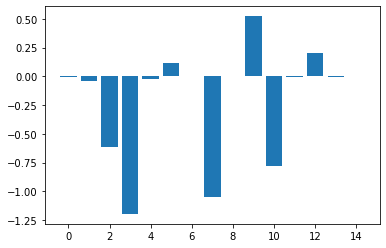

In [37]:
# get importance
importance = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


# DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier()
clf_model = clf_model.fit(X_train, y_train)
print(f'Training Score: {clf_model.score(X_train, y_train)}')
print(f'Testing Score: {clf_model.score(X_test, y_test)}')

dtc_train_score = clf_model.score(X_train, y_train)
dtc_test_score = clf_model.score(X_test, y_test)

Training Score: 0.9991073199761952
Testing Score: 0.9007686585668238


In [40]:
y_pred_dtc = clf_model.predict(X_test)
y_pred_dtc

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

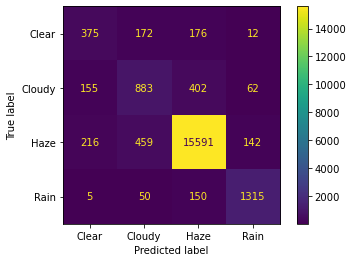

In [41]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_dtc, labels=clf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_model.classes_)
disp.plot()

In [42]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
dtc_accuracy = balanced_accuracy_score(y_test, y_pred_dtc)
dtc_precision = precision_score(y_test, y_pred_dtc, average='weighted')
dtc_recall = recall_score(y_test, y_pred_dtc, average='weighted')

In [43]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_dtc))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.50      0.51      0.50       735
      Cloudy       0.56      0.59      0.58      1502
        Haze       0.96      0.95      0.95     16408
        Rain       0.86      0.87      0.86      1520

    accuracy                           0.90     20165
   macro avg       0.72      0.73      0.72     20165
weighted avg       0.90      0.90      0.90     20165



Feature: 0, Score: 0.16759
Feature: 1, Score: 0.04176
Feature: 2, Score: 0.05563
Feature: 3, Score: 0.05179
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.12445
Feature: 6, Score: 0.07375
Feature: 7, Score: 0.13309
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.07611
Feature: 10, Score: 0.01309
Feature: 11, Score: 0.00010
Feature: 12, Score: 0.14820
Feature: 13, Score: 0.06305
Feature: 14, Score: 0.05139


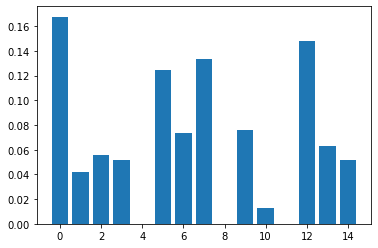

In [44]:
# get importance
importance = clf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


# RandomForestClassifier

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

rfc_train_score = clf.score(X_train_scaled, y_train)
rfc_test_score = clf.score(X_test_scaled, y_test)

Training Score: 0.9991073199761952
Testing Score: 0.9342920902553931


In [48]:
y_pred_rfc = clf.predict(X_test_scaled)
y_pred_rfc

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

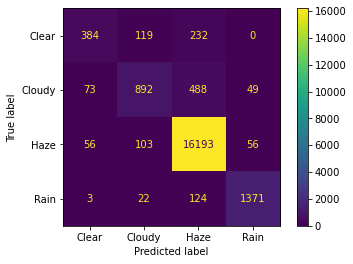

In [49]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rfc, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [50]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
rfc_accuracy = balanced_accuracy_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc, average='weighted')
rfc_recall = recall_score(y_test, y_pred_rfc, average='weighted')

In [51]:
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_rfc))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.74      0.52      0.61       735
      Cloudy       0.79      0.59      0.68      1502
        Haze       0.95      0.99      0.97     16408
        Rain       0.93      0.90      0.92      1520

    accuracy                           0.93     20165
   macro avg       0.85      0.75      0.79     20165
weighted avg       0.93      0.93      0.93     20165



Feature: 0, Score: 0.12410
Feature: 1, Score: 0.04564
Feature: 2, Score: 0.06668
Feature: 3, Score: 0.02590
Feature: 4, Score: 0.00005
Feature: 5, Score: 0.17251
Feature: 6, Score: 0.07409
Feature: 7, Score: 0.09472
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.08457
Feature: 10, Score: 0.02587
Feature: 11, Score: 0.00006
Feature: 12, Score: 0.16643
Feature: 13, Score: 0.06499
Feature: 14, Score: 0.05440


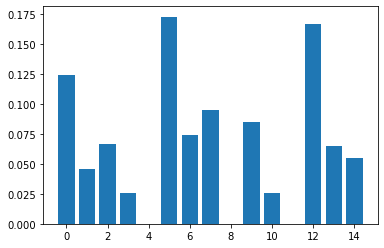

In [52]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


# RandomOverSampler - Logistic Regression

In [54]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'Clear': 49517, 'Haze': 49517, 'Cloudy': 49517, 'Rain': 49517})

In [55]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
ros_lr_model = LogisticRegression(solver='newton-cg', random_state=1)
ros_lr_model.fit(X_resampled, y_resampled)
print(f'Training Score: {ros_lr_model.score(X_resampled, y_resampled)}')
print(f'Testing Score: {ros_lr_model.score(X_test, y_test)}')

ros_lr_train_score = ros_lr_model.score(X_resampled, y_resampled)
ros_lr_test_score = ros_lr_model.score(X_test, y_test)

Training Score: 0.6447836096694065
Testing Score: 0.6595090503347384


In [56]:
y_pred_ros_lr = ros_lr_model.predict(X_test)
y_pred_ros_lr

array(['Clear', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

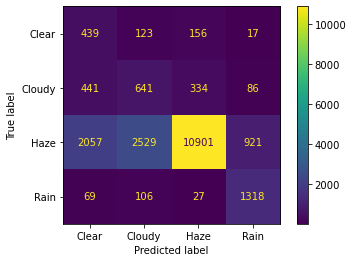

In [57]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_ros_lr, labels=ros_lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ros_lr_model.classes_)
disp.plot()

In [58]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
ros_lr_accuracy = balanced_accuracy_score(y_test, y_pred_ros_lr)
ros_lr_precision = precision_score(y_test, y_pred_ros_lr, average='weighted')
ros_lr_recall = recall_score(y_test, y_pred_ros_lr, average='weighted')

In [59]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_ros_lr))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.15      0.60      0.23       735
      Cloudy       0.19      0.43      0.26      1502
        Haze       0.95      0.66      0.78     16408
        Rain       0.56      0.87      0.68      1520

    accuracy                           0.66     20165
   macro avg       0.46      0.64      0.49     20165
weighted avg       0.84      0.66      0.72     20165



Feature: 0, Score: -0.00598
Feature: 1, Score: -0.03558
Feature: 2, Score: -0.71976
Feature: 3, Score: -1.91621
Feature: 4, Score: -0.11585
Feature: 5, Score: 0.14188
Feature: 6, Score: -0.00000
Feature: 7, Score: -2.37479
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.62323
Feature: 10, Score: -2.13628
Feature: 11, Score: -0.03666
Feature: 12, Score: 0.05930
Feature: 13, Score: -0.00165
Feature: 14, Score: 0.00233


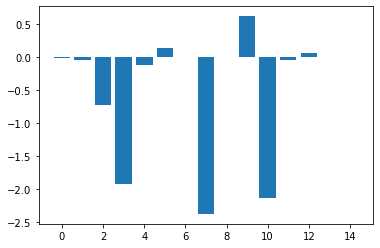

In [60]:
# get importance
importance = ros_lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


# RandomOverSampler - DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
ros_clf_model = DecisionTreeClassifier()
ros_clf_model = ros_clf_model.fit(X_resampled, y_resampled)
print(f'Training Score: {ros_clf_model.score(X_resampled, y_resampled)}')
print(f'Testing Score: {ros_clf_model.score(X_test, y_test)}')

ros_dtc_train_score = ros_clf_model.score(X_resampled, y_resampled)
ros_dtc_test_score = ros_clf_model.score(X_test, y_test)

Training Score: 0.9990811236545025
Testing Score: 0.9015125216960079


In [63]:
y_pred_ros_dtc = ros_clf_model.predict(X_test)
y_pred_ros_dtc

array(['Clear', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

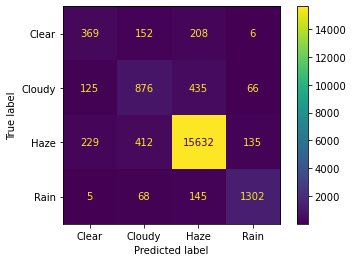

In [64]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_ros_dtc, labels=ros_clf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ros_clf_model.classes_)
disp.plot()

In [65]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
ros_dtc_accuracy = balanced_accuracy_score(y_test, y_pred_ros_dtc)
ros_dtc_precision = precision_score(y_test, y_pred_ros_dtc, average='weighted')
ros_dtc_recall = recall_score(y_test, y_pred_ros_dtc, average='weighted')

In [66]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_ros_dtc))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.51      0.50      0.50       735
      Cloudy       0.58      0.58      0.58      1502
        Haze       0.95      0.95      0.95     16408
        Rain       0.86      0.86      0.86      1520

    accuracy                           0.90     20165
   macro avg       0.73      0.72      0.72     20165
weighted avg       0.90      0.90      0.90     20165



Feature: 0, Score: 0.18849
Feature: 1, Score: 0.06373
Feature: 2, Score: 0.07274
Feature: 3, Score: 0.02640
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.16992
Feature: 6, Score: 0.06879
Feature: 7, Score: 0.09229
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.05867
Feature: 10, Score: 0.01420
Feature: 11, Score: 0.00017
Feature: 12, Score: 0.12810
Feature: 13, Score: 0.06146
Feature: 14, Score: 0.05505


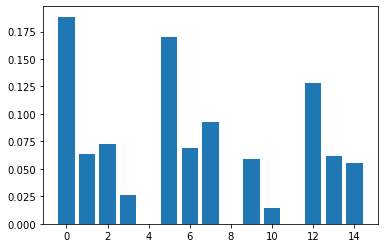

In [67]:
# get importance
importance = ros_clf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


# RandomOverSample - RandomForestClassifier

In [69]:
# Resampling scaled data
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_resampled)

Counter({'Clear': 49517, 'Haze': 49517, 'Cloudy': 49517, 'Rain': 49517})

In [70]:
ros_clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_resampled, y_resampled)
print(f'Training Score: {ros_clf.score(X_resampled, y_resampled)}')
print(f'Testing Score: {ros_clf.score(X_test_scaled, y_test)}')

ros_rfc_train_score = ros_clf.score(X_resampled, y_resampled)
ros_rfc_test_score = ros_clf.score(X_test_scaled, y_test)

Training Score: 0.9990811236545025
Testing Score: 0.9351847260104141


In [71]:
y_pred_ros_rfc = ros_clf.predict(X_test_scaled)
y_pred_ros_rfc

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

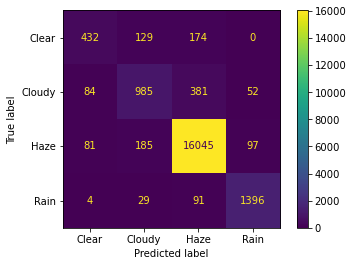

In [72]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_ros_rfc, labels=ros_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ros_clf.classes_)
disp.plot()

In [73]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
ros_rfc_accuracy = balanced_accuracy_score(y_test, y_pred_ros_rfc)
ros_rfc_precision = precision_score(y_test, y_pred_ros_rfc, average='weighted')
ros_rfc_recall = recall_score(y_test, y_pred_ros_rfc, average='weighted')

In [74]:
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_ros_rfc))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.72      0.59      0.65       735
      Cloudy       0.74      0.66      0.70      1502
        Haze       0.96      0.98      0.97     16408
        Rain       0.90      0.92      0.91      1520

    accuracy                           0.94     20165
   macro avg       0.83      0.78      0.81     20165
weighted avg       0.93      0.94      0.93     20165



Feature: 0, Score: 0.16685
Feature: 1, Score: 0.06194
Feature: 2, Score: 0.08031
Feature: 3, Score: 0.01716
Feature: 4, Score: 0.00006
Feature: 5, Score: 0.15455
Feature: 6, Score: 0.08222
Feature: 7, Score: 0.07284
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.08951
Feature: 10, Score: 0.01781
Feature: 11, Score: 0.00012
Feature: 12, Score: 0.12789
Feature: 13, Score: 0.06792
Feature: 14, Score: 0.06081


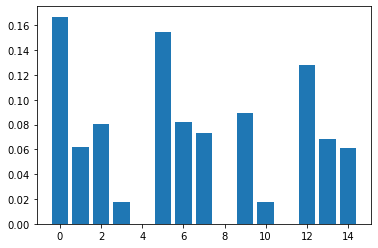

In [75]:
# get importance
importance = ros_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


# RandomUnderSampler - Logistic Regression

In [77]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'Clear': 2143, 'Cloudy': 2143, 'Haze': 2143, 'Rain': 2143})

In [78]:
from sklearn.linear_model import LogisticRegression
rus_model = LogisticRegression(solver='newton-cg', random_state=1, max_iter=150)
rus_model.fit(X_resampled, y_resampled)
print(f'Training Score: {rus_model.score(X_resampled, y_resampled)}')
print(f'Testing Score: {rus_model.score(X_test, y_test)}')

rus_lr_train_score = rus_model.score(X_resampled, y_resampled)
rus_lr_test_score = rus_model.score(X_test, y_test)

Training Score: 0.6560895940270649
Testing Score: 0.6586660054549963


In [79]:
y_pred_rus_lr = rus_model.predict(X_test)
y_pred_rus_lr

array(['Clear', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

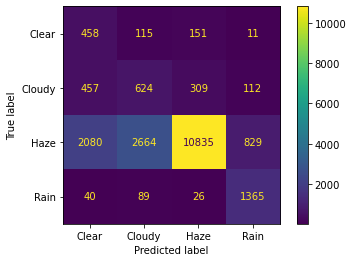

In [80]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rus_lr, labels=rus_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rus_model.classes_)
disp.plot()

In [81]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
rus_lr_accuracy = balanced_accuracy_score(y_test, y_pred_rus_lr)
rus_lr_precision = precision_score(y_test, y_pred_rus_lr, average='weighted')
rus_lr_recall = recall_score(y_test, y_pred_rus_lr, average='weighted')

In [82]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_rus_lr))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.15      0.62      0.24       735
      Cloudy       0.18      0.42      0.25      1502
        Haze       0.96      0.66      0.78     16408
        Rain       0.59      0.90      0.71      1520

    accuracy                           0.66     20165
   macro avg       0.47      0.65      0.50     20165
weighted avg       0.84      0.66      0.72     20165



Feature: 0, Score: -0.03553
Feature: 1, Score: -0.04051
Feature: 2, Score: -0.65395
Feature: 3, Score: -1.57366
Feature: 4, Score: -0.00204
Feature: 5, Score: 0.12871
Feature: 6, Score: -0.00005
Feature: 7, Score: -2.69210
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.56296
Feature: 10, Score: -2.38327
Feature: 11, Score: -0.24209
Feature: 12, Score: 0.05264
Feature: 13, Score: -0.00161
Feature: 14, Score: 0.00078


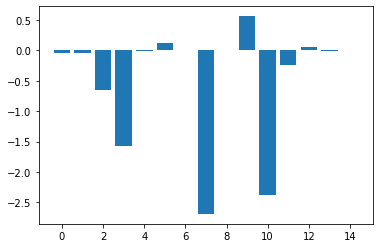

In [83]:
# get importance
importance = rus_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# RandomUnderSampler - DecisionTreeClassifier

In [84]:
#Fitting Decision Tree model

rus_clf_model = clf_model.fit(X_resampled, y_resampled)
print(f'Training Score: {rus_clf_model.score(X_resampled, y_resampled)}')
print(f'Testing Score: {rus_clf_model.score(X_test, y_test)}')

rus_dtc_train_score = rus_clf_model.score(X_resampled, y_resampled)
rus_dtc_test_score = rus_clf_model.score(X_test, y_test)

Training Score: 0.999066728884741
Testing Score: 0.756508802380362


In [85]:
y_pred_rus_dtc = rus_clf_model.predict(X_test)
y_pred_rus_dtc

array(['Cloudy', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'],
      dtype=object)

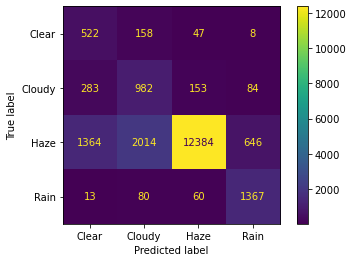

In [86]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rus_dtc, labels=rus_clf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rus_clf_model.classes_)
disp.plot()

In [87]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
rus_dtc_accuracy = balanced_accuracy_score(y_test, y_pred_rus_dtc)
rus_dtc_precision = precision_score(y_test, y_pred_rus_dtc, average='weighted')
rus_dtc_recall = recall_score(y_test, y_pred_rus_dtc, average='weighted')

In [88]:
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_rus_dtc))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.24      0.71      0.36       735
      Cloudy       0.30      0.65      0.41      1502
        Haze       0.98      0.75      0.85     16408
        Rain       0.65      0.90      0.75      1520

    accuracy                           0.76     20165
   macro avg       0.54      0.75      0.59     20165
weighted avg       0.88      0.76      0.79     20165



Feature: 0, Score: 0.18350
Feature: 1, Score: 0.06925
Feature: 2, Score: 0.05041
Feature: 3, Score: 0.02625
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.17880
Feature: 6, Score: 0.07476
Feature: 7, Score: 0.08832
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.07098
Feature: 10, Score: 0.01170
Feature: 11, Score: 0.00030
Feature: 12, Score: 0.12343
Feature: 13, Score: 0.06019
Feature: 14, Score: 0.06210


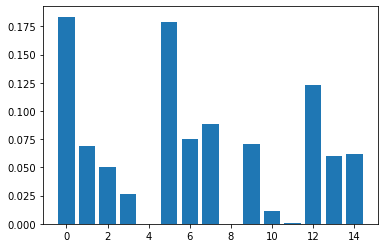

In [89]:
# get importance
importance = rus_clf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


# RandomUnderSampler - RandomForestClassifier

In [91]:
# Resampling scaled data
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'Clear': 2143, 'Cloudy': 2143, 'Haze': 2143, 'Rain': 2143})

In [92]:
from sklearn.ensemble import RandomForestClassifier
rus_clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_resampled, y_resampled)
print(f'Training Score: {rus_clf.score(X_resampled, y_resampled)}')
print(f'Testing Score: {rus_clf.score(X_test_scaled, y_test)}')

rus_rfc_train_score = rus_clf.score(X_resampled, y_resampled)
rus_rfc_test_score = rus_clf.score(X_test_scaled, y_test)

Training Score: 0.999066728884741
Testing Score: 0.8418546987354327


In [93]:
y_pred_rus_rfc = rus_clf.predict(X_test_scaled)
y_pred_rus_rfc

array(['Clear', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

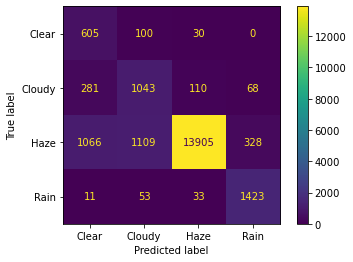

In [94]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rus_rfc, labels=rus_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rus_clf.classes_)
disp.plot()

In [95]:
# Calulating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
rus_rfc_accuracy = balanced_accuracy_score(y_test, y_pred_rus_rfc)
rus_rfc_precision = precision_score(y_test, y_pred_rus_rfc, average='weighted')
rus_rfc_recall = recall_score(y_test, y_pred_rus_rfc, average='weighted')

In [96]:
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_rus_rfc))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.31      0.82      0.45       735
      Cloudy       0.45      0.69      0.55      1502
        Haze       0.99      0.85      0.91     16408
        Rain       0.78      0.94      0.85      1520

    accuracy                           0.84     20165
   macro avg       0.63      0.83      0.69     20165
weighted avg       0.91      0.84      0.86     20165



Feature: 0, Score: 0.16141
Feature: 1, Score: 0.06362
Feature: 2, Score: 0.08528
Feature: 3, Score: 0.01604
Feature: 4, Score: 0.00005
Feature: 5, Score: 0.15690
Feature: 6, Score: 0.08193
Feature: 7, Score: 0.06720
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.09329
Feature: 10, Score: 0.01406
Feature: 11, Score: 0.00018
Feature: 12, Score: 0.12311
Feature: 13, Score: 0.07151
Feature: 14, Score: 0.06540


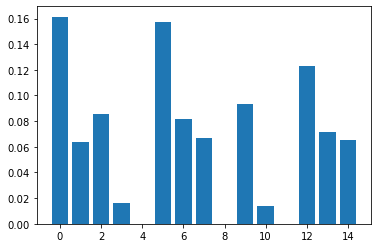

In [97]:
# get importance
importance = rus_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80657 entries, 0 to 80656
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       80657 non-null  object 
 1   month      80657 non-null  object 
 2   dewptm     80657 non-null  float64
 3   fog        80657 non-null  int64  
 4   hail       80657 non-null  int64  
 5   hum        80657 non-null  float64
 6   pressurem  80657 non-null  float64
 7   rain       80657 non-null  int64  
 8   snow       80657 non-null  int64  
 9   tempm      80657 non-null  float64
 10  thunder    80657 non-null  int64  
 11  tornado    80657 non-null  int64  
 12  vism       80657 non-null  float64
 13  wdird      80657 non-null  float64
 14  wspdm      80657 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ MB


#  Comparing Models

In [99]:
results = [['Logistic Regression', lr_accuracy, lr_recall, ros_lr_accuracy, ros_lr_recall, rus_lr_accuracy, rus_lr_recall],
           ['Decision Tree', dtc_accuracy, dtc_recall, ros_dtc_accuracy, ros_dtc_recall, rus_dtc_accuracy, rus_dtc_recall],
           ['Random Forest', rfc_accuracy, rfc_recall, ros_rfc_accuracy, ros_rfc_recall, rus_rfc_accuracy, rus_rfc_recall],
          ]

results_df = pd.DataFrame(results, columns = ['Classifier', 'Model_Accuracy_Score', 'Model_Recall_Score', 'Accuracy_Random_Oversampling', 'Recall_Random_Oversampling'
                                             , 'Accuracy_Random_Undersampling', 'Recall_Random_Undersampling'])
results_df

,Classifier,Model_Accuracy_Score,Model_Recall_Score,Accuracy_Random_Oversampling,Recall_Random_Oversampling,Accuracy_Random_Undersampling,Recall_Random_Undersampling
0,Logistic Regression,0.423144,0.852021,0.638880,0.659509,0.649238,0.658666
1,Decision Tree,0.728356,0.900769,0.723637,0.901513,0.754524,0.756509
2,Random Forest,0.751299,0.934292,0.784961,0.935185,0.825293,0.841855


In [100]:
scores = [['Logistic Regression', lr_train_score, lr_test_score, ros_lr_train_score, ros_lr_test_score, rus_lr_train_score, rus_lr_test_score],
          ['Decision Tree', dtc_train_score, dtc_test_score, ros_dtc_train_score, ros_dtc_test_score, rus_dtc_train_score, rus_dtc_test_score],
          ['Random Forest', rfc_train_score, rfc_test_score, ros_rfc_train_score, ros_rfc_test_score, rus_rfc_train_score, rus_rfc_test_score]
    
]

scores_df = pd.DataFrame(scores, columns = ['Classifier', 'Model_Train_Score', 'Model_Test_Score', 'ROS_Train_Score', 'ROS_Test_Score', 'RUS_Train_Score', 'RUS_Test_Score'])
scores_df

,Classifier,Model_Train_Score,Model_Test_Score,ROS_Train_Score,ROS_Test_Score,RUS_Train_Score,RUS_Test_Score
0,Logistic Regression,0.856543,0.852021,0.644784,0.659509,0.656090,0.658666
1,Decision Tree,0.999107,0.900769,0.999081,0.901513,0.999067,0.756509
2,Random Forest,0.999107,0.934292,0.999081,0.935185,0.999067,0.841855


In [101]:
model_results = [['Logistic Regression', lr_accuracy, lr_recall, lr_precision],
                ['Decision Tree', dtc_accuracy, dtc_recall, dtc_precision],
                ['Random Forest', rfc_accuracy, rfc_recall, rfc_precision]]
model_df = pd.DataFrame(model_results, columns = ['Classifier', 'Bal_Accuracy_Score', 'Recall_Score', 'Precision_Score'])
model_df

,Classifier,Bal_Accuracy_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.423144,0.852021,0.805913
1,Decision Tree,0.728356,0.900769,0.902385
2,Random Forest,0.751299,0.934292,0.929005


In [102]:
ros_results = [['Logistic Regression', ros_lr_accuracy, ros_lr_recall, ros_lr_precision],
                ['Decision Tree', ros_dtc_accuracy, ros_dtc_recall, ros_dtc_precision],
                ['Random Forest', ros_rfc_accuracy, ros_rfc_recall, ros_rfc_precision]]
ros_df = pd.DataFrame(ros_results, columns = ['Classifier', 'Bal_Accuracy_Oversampling', 'Recall_Oversampling', 'Precision_Oversampling'])
ros_df

,Classifier,Bal_Accuracy_Oversampling,Recall_Oversampling,Precision_Oversampling
0,Logistic Regression,0.638880,0.659509,0.838634
1,Decision Tree,0.723637,0.901513,0.901420
2,Random Forest,0.784961,0.935185,0.931750


In [103]:
rus_results = [['Logistic Regression', rus_lr_accuracy, rus_lr_recall, rus_lr_precision],
                ['Decision Tree', rus_dtc_accuracy, rus_dtc_recall, rus_dtc_precision],
                ['Random Forest', rus_rfc_accuracy, rus_rfc_recall, rus_rfc_precision]]
rus_df = pd.DataFrame(rus_results, columns = ['Classifier', 'Bal_Accuracy_Undersampling', 'Recall_Undersampling', 'Precision_Undersampling'])
rus_df

,Classifier,Bal_Accuracy_Undersampling,Recall_Undersampling,Precision_Undersampling
0,Logistic Regression,0.649238,0.658666,0.841974
1,Decision Tree,0.754524,0.756509,0.877243
2,Random Forest,0.825293,0.841855,0.907594


In [104]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'Clear': 49517, 'Haze': 49517, 'Cloudy': 49517, 'Rain': 49517})

In [105]:
smo_clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_resampled, y_resampled)
print(f'Training Score: {smo_clf.score(X_resampled, y_resampled)}')
print(f'Testing Score: {smo_clf.score(X_test_scaled, y_test)}')

#ros_rfc_train_score = ros_clf.score(X_resampled, y_resampled)
#ros_rfc_test_score = ros_clf.score(X_test_scaled, y_test)

Training Score: 0.9997122200456409
Testing Score: 0.9340937267542773


In [106]:
y_pred_smo_clf = smo_clf.predict(X_test_scaled)
y_pred_smo_clf

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

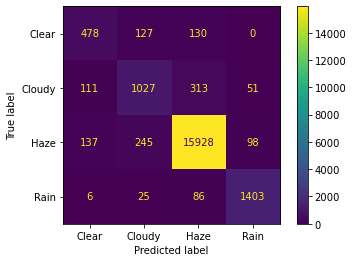

In [107]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_smo_clf, labels=smo_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=smo_clf.classes_)
disp.plot()

In [108]:
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred_smo_clf))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.65      0.65      0.65       735
      Cloudy       0.72      0.68      0.70      1502
        Haze       0.97      0.97      0.97     16408
        Rain       0.90      0.92      0.91      1520

    accuracy                           0.93     20165
   macro avg       0.81      0.81      0.81     20165
weighted avg       0.93      0.93      0.93     20165



In [109]:
smo_clf_accuracy = balanced_accuracy_score(y_test, y_pred_smo_clf)
smo_clf_accuracy

0.8069668556895055